# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily
from sklearn import datasets

iris = datasets.load_iris()

# Importing data

In [ ]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print dataset
dataset.describe()
dataset.info()
dataset.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Flower        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Print dataset shape
dataset.shape


(150, 5)

In [ ]:
# Print column names
dataset.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [ ]:
# Drop na
dataset = dataset.dropna()


3. Encoding the class label categorical column: from string to num


In [ ]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset['species_encoded'] = dataset['Flower'].map(species_mapping)


#Visualize the dataset
print(dataset)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     species_encoded  
0                  0  
1                  0  
2     

Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# Drop out non necesary columns
dataset = dataset.drop(['Flower'], axis=1)


5. Scatter plot of the data

<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

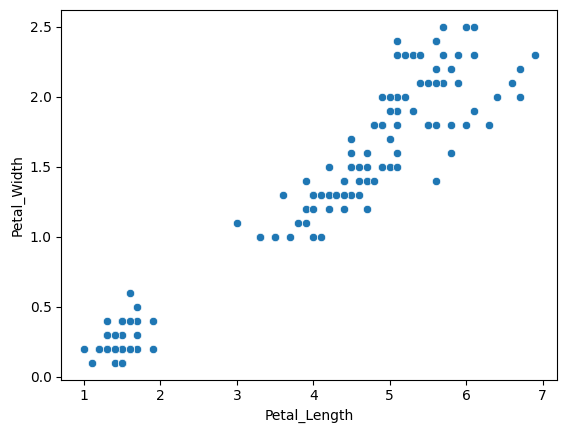

In [ ]:
# Scatter plot of Petal_Length vs Petal_Width
sns.scatterplot(x=dataset['Petal_Length'], y=dataset['Petal_Width'])



<Axes: xlabel='Petal_Length', ylabel='Sepal_Length'>

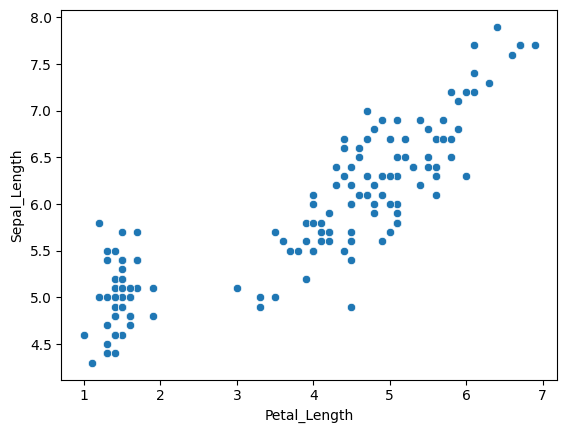

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(x=dataset['Petal_Length'], y=dataset['Sepal_Length'])




<Axes: xlabel='Petal_Length', ylabel='Sepal_Width'>

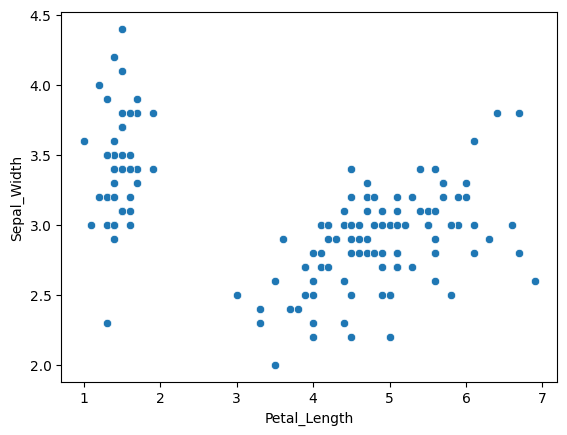

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(x=dataset['Petal_Length'], y=dataset['Sepal_Width'])




<Axes: xlabel='Petal_Width', ylabel='Sepal_Length'>

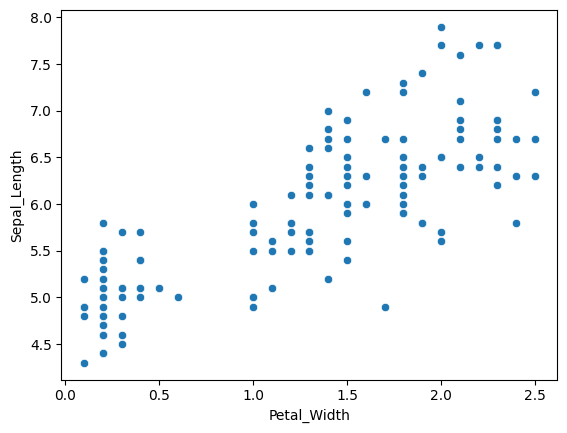

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Length
sns.scatterplot(x=dataset['Petal_Width'], y=dataset['Sepal_Length'])



<Axes: xlabel='Petal_Width', ylabel='Sepal_Width'>

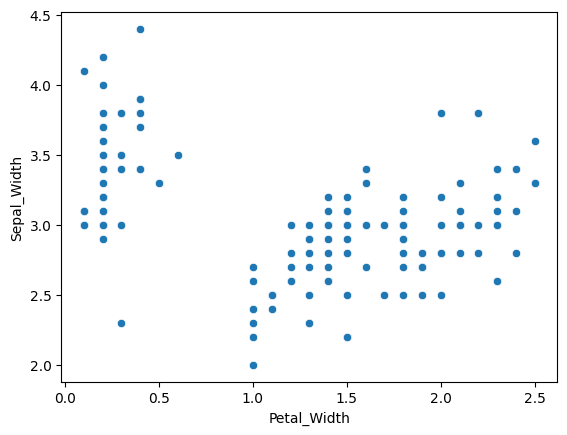

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Width
sns.scatterplot(x=dataset['Petal_Width'], y=dataset['Sepal_Width'])




<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

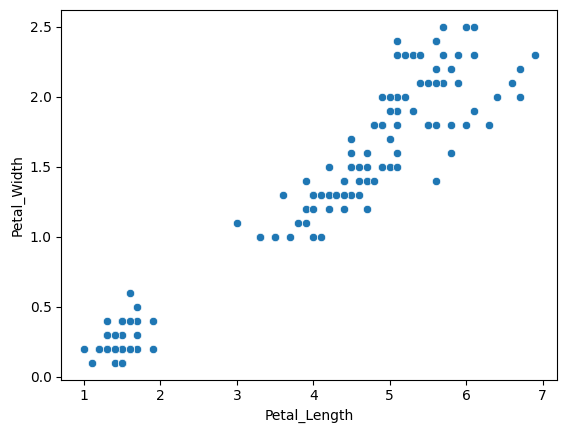

In [ ]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(x=dataset['Petal_Length'], y=dataset['Petal_Width'])




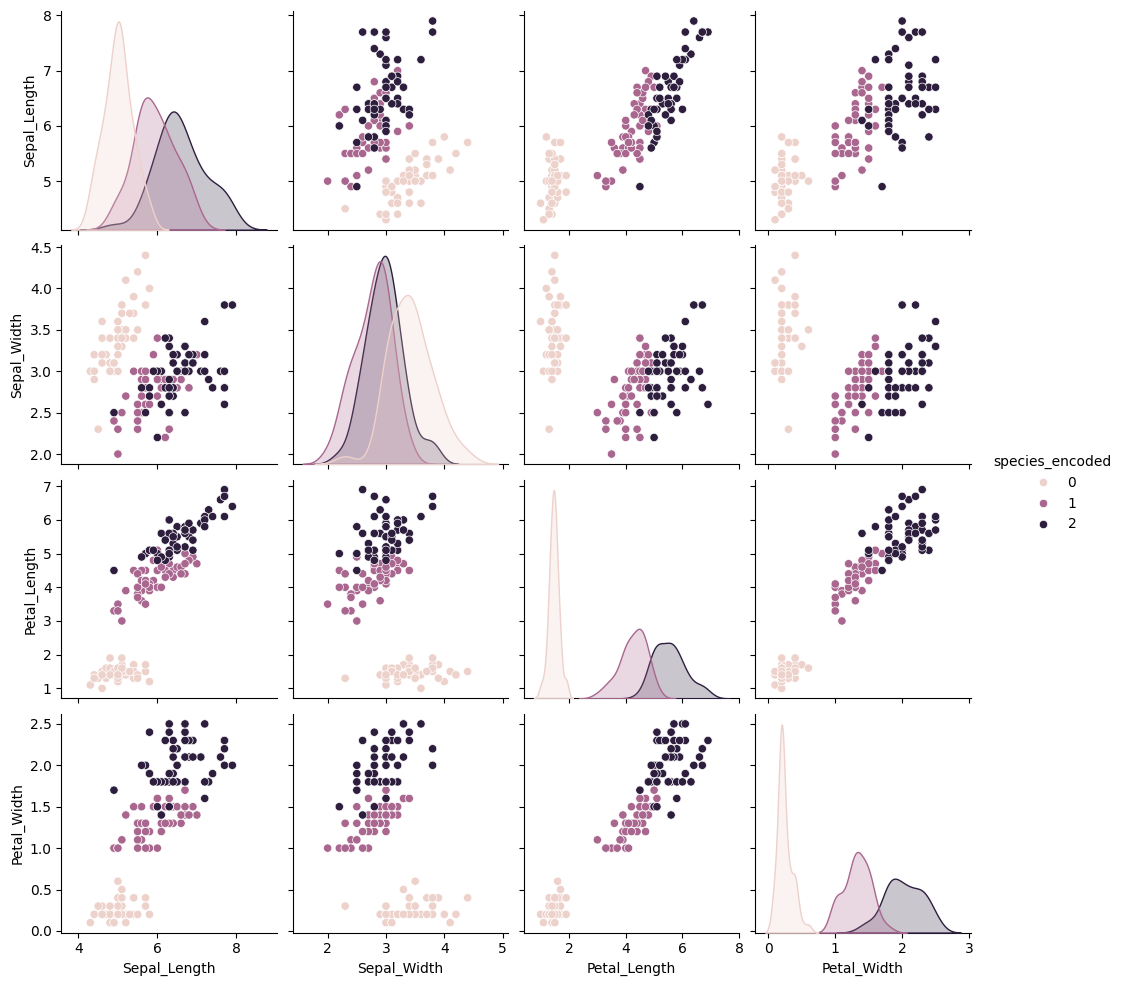

In [ ]:
# Pairplot: Scatterplot of all variables (With the flower type)
sns.pairplot(dataset, hue='species_encoded')



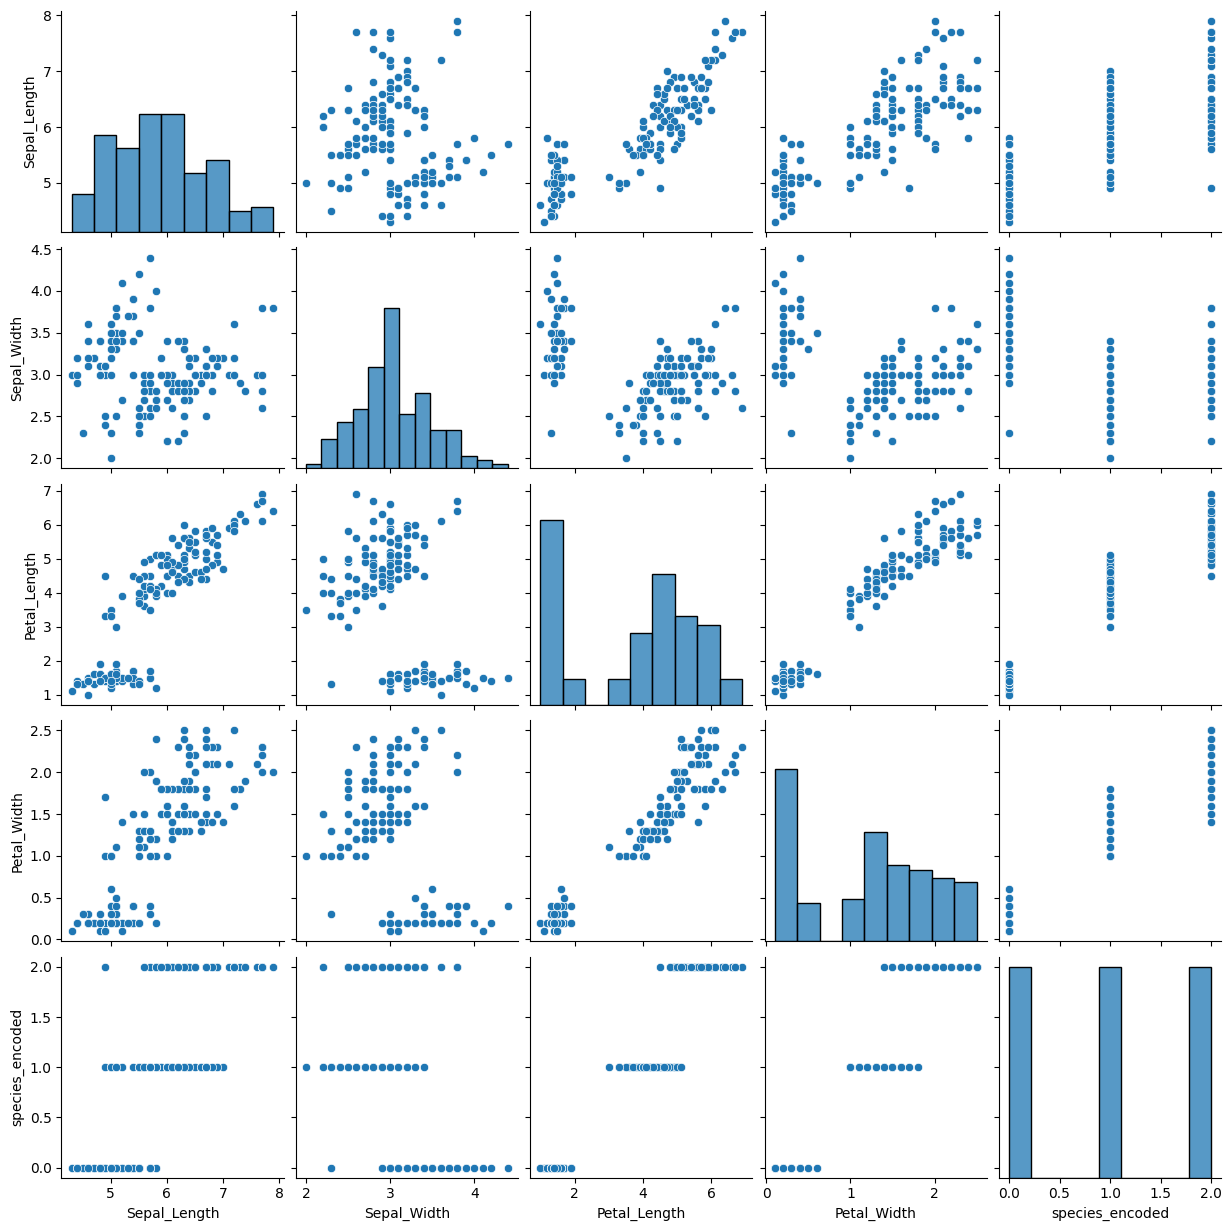

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset)



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [ ]:
# Get dataframes for each real cluster



<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

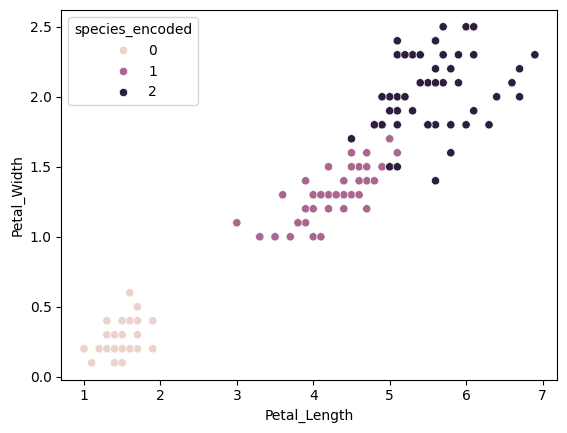

In [ ]:
# Scatter plot of each real cluster for Petal
sns.scatterplot(x=dataset['Petal_Length'], y=dataset['Petal_Width'], hue=dataset['species_encoded'])




<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

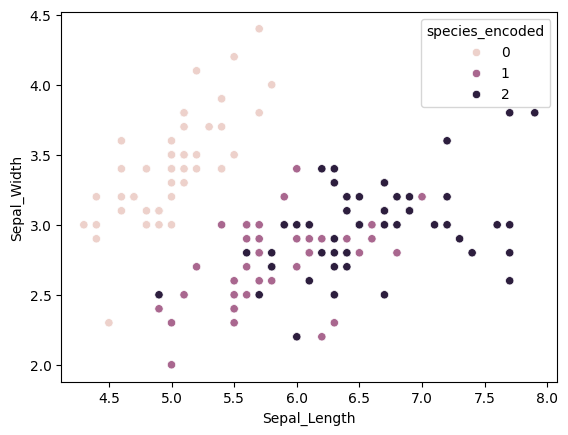

In [ ]:
# Scatter plot of each real cluster for Sepal
sns.scatterplot(x=dataset['Sepal_Length'], y=dataset['Sepal_Width'], hue=dataset['species_encoded'])




Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [ ]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["species_encoded"].values


In [ ]:
# Understand the data X
print(X)
X.dtype


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

dtype('float64')

In [ ]:
# Understand the data y
print(y)
y.dtype

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


dtype('int64')

In [ ]:
# Calculate the number of observations in the dataset
n_obs = X.shape[0]
print(n_obs)



150


In [ ]:
# Calculate the number of observations for class 0
n_obs_class_0 = len(y[y == 0])
print(n_obs_class_0)


50


In [ ]:
# Calculate the number of observations for class 1
n_obs_class_1 = len(y[y == 1])
print(n_obs_class_1)


50


In [ ]:
# Calculate the number of observations for class 2
n_obs_class_2 = len(y[y == 2])
print(n_obs_class_2)



50


# Train a classifier

## Train the classification model

In [ ]:
# Import sklearn linear_model
from sklearn import linear_model, naive_bayes

# Initialize the classifier
#classifier = linear_model.LogisticRegression()

# Fit the model to the training data
classifier =naive_bayes.GaussianNB()

# Fit the model to the training data
classifier.fit(X, y)

print(classifier)


GaussianNB()


## Predict the class of a new observation

In [ ]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
print(xnew)

# Predict the class of the new observation
ynew = classifier.predict(xnew)

# Print the predicted class of the new observation
print(ynew)


[[5.5 3.5 1.5 0.5]]
[0]


In [ ]:
# Make the prediction using xnew

ynew = classifier.predict(xnew)

# Get the predicted class
print(ynew)


[2]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [ ]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

#https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html
# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)



In [ ]:
# Number of observations in the train set
n_obs_train = X_train.shape[0]
print(n_obs_train)


120


In [ ]:
# Number of observations of each class in the train set
n_obs_class_0_train = len(y_train[y_train == 0])


n_obs_class_1_train = len(y_train[y_train == 1])


n_obs_class_2_train = len(y_train[y_train == 2])
print(n_obs_class_0_train,n_obs_class_1_train,n_obs_class_2_train)



40 41 39


In [ ]:
# Number of observations in the test set
n_obs_test = X_test.shape[0]
print(n_obs_test)


30


In [ ]:
# Number of observations of each class in the test set
n_obs_class_0_test = len(y_test[y_test == 0])
n_obs_class_1_test = len(y_test[y_test == 1])
n_obs_class_2_test = len(y_test[y_test == 2])
print(n_obs_class_0_test,n_obs_class_1_test,n_obs_class_2_test)


10 9 11


## Train the classification model

In [ ]:
# Initialize the classifier
#classifier = linear_model.LogisticRegression()
classifier = naive_bayes.GaussianNB()

# Fit the model to the training data
classifier.fit(X_train, y_train)



GaussianNB()

## Test the classification model

In [ ]:
#https://scikit-learn.org/1.3/tutorial/statistical_inference/supervised_learning.html
# Make the predictions using the test set
y_pred = classifier.predict(X_test)



In [ ]:
# Explore real and predicted labels
print(y_test, y_pred)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Compute the acurracy

In [ ]:
# Define a function to compute accuracy
def accuracy(y_test, y_pred):
    return np.mean(y_test == y_pred)


In [ ]:
# Calculate total accuracy
calc_acc= accuracy(y_test, y_pred)
print(calc_acc)



0.9666666666666667


In [ ]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score

calc_acc = accuracy_score(y_test, y_pred)
print(calc_acc)



0.9666666666666667


In [ ]:
# Compute accuracy for class 0
calc_acc_0 = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
print(calc_acc_0)


1.0


In [ ]:
# Compute accuracy for class 1
calc_acc_1 = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
print(calc_acc_1)


0.9487179487179487


In [ ]:
# Compute accuracy for class 2
calc_acc_2 = accuracy_score(y_test[y_test == 2], y_pred[y_test == 2])
print(calc_acc_2)


0.9473684210526315


## Confussion matrix

In [ ]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, normalize='true')

array([[1.        , 0.        , 0.        ],
       [0.        , 0.94871795, 0.05128205],
       [0.        , 0.05263158, 0.94736842]])

<Axes: >

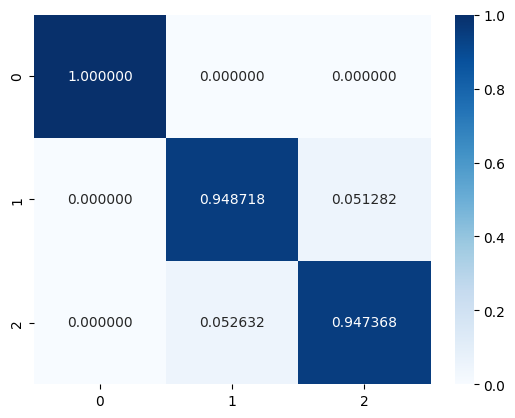

In [ ]:
# Plot normalized confussion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt='f', cmap='Blues')


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

***1) First off, for the (a) four variables we achieved an accuracy of 1 for each of the three classes by using an split 80% to train and 20% to test. This was achieved with the random seed being 42. Now for the (b) strangely enough we are achieving the same level of accuracy than the one obtained with four variables with an accuracy under the same conditions as a of 1 for each class. Finally, for (c) using the Sepal variables the results were much more diverse, for class 1 the accuracy remained as 1 however for class it drastically reduced to .77 and for class 3 we obtain .90 as accuracy, this tell us that under these conditions 2 variables migth be convienent for the less computing power required. ***

***2) First of we had started by using the logistic Regression with the logistic Regression, and using a test size of .2 we would obtain an acuraccy of 1 for each class, then we switched to using the GaussianNB, with this Gaussian we obtained the same results and performance. However for other scenarios is important to consider that the Gaussian is often less accurate, especially if the features are correlated (because it assumes feature independence)***